In [1]:
!pip install cirq
!pip install cirq --quiet
!pip install qiskit --quiet
!pip install pylatexenc
!pip install galois

     |████████████████████████████████| 328 kB 8.2 MB/s 
     |████████████████████████████████| 1.6 MB 53.5 MB/s 
     |████████████████████████████████| 437 kB 57.2 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 47 kB 5.4 MB/s 
     |████████████████████████████████| 145 kB 58.8 MB/s 
     |████████████████████████████████| 10.1 MB 38.1 MB/s 
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 220 kB 64.9 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 229 kB 60.2 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 243 kB 54.9 MB/s 
     |████████████████████████

     |████████████████████████████████| 6.5 MB 5.4 MB/s 
     |████████████████████████████████| 18.0 MB 42 kB/s 
     |████████████████████████████████| 238 kB 71.9 MB/s 
     |████████████████████████████████| 200 kB 42.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 57.5 MB/s 
     |████████████████████████████████| 943 kB 43.8 MB/s 
     |████████████████████████████████| 37.5 MB 31 kB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 3.6 MB 36.2 MB/s 
     |████████████████████████████████| 113 kB 68.9 MB/s 
     |████████████████████████████████| 162 kB 5.3 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=3172ea1a4f610c3b02e6a7d0edf7654fe41155c7593f98eb45e489753248710f
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395

In [2]:
!pip install ortools

     |████████████████████████████████| 15.5 MB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [3]:
import numpy as np
import random
import time
import itertools as itert
import matplotlib.pyplot as plt
import math
from qiskit import *
from qiskit.providers.jobstatus import JobStatus
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import MCMT
from qiskit.tools.monitor import job_monitor
from tqdm.notebook import tqdm
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit.providers.aer.noise import NoiseModel
from qiskit.circuit import Gate, Instruction, ParameterVector
from qiskit.test.mock import FakeVigo
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer import AerSimulator
import galois
import qiskit.quantum_info as qi

%matplotlib inline


**Simons**'s

In [4]:
def getFx(n,verbose):  
  s = np.random.randint(2, size = n) # Generate s for the funct 
  # print(sum(s))
  # s = 0 
  funct = ["0" for i in range(2**n)] #initialise the mapping of funct 
  # if s = [0]^n, then simply make a one to one mapping from input to putput space
  if(sum(s)==0):
      tot = []
      for i in range(2**(n)):
          val = bin(i)[2:].zfill(n)
          tot.append(val)

      funct = np.random.permutation(tot) 
      if(verbose): 
        print("Function show")
      str_s = [str(int) for int in s]
      str_s = "".join(str_s)
      if(verbose): 
        print("Function is created with s = " + str_s)
        print("Input, Output")
      for i in range(2**(n)):
        val = bin(i)[2:].zfill(n)
        if(verbose):
          print(val,funct[i])
  

  # if s!=[0]^n, then create a 2 to 1 mapping function    
  else:
      tot = [] # storing function mappins
      mull = np.ones(n)
      twos = 1
      for i in range(n):
          mull[-1-i] = twos
          twos *= 2
      s_int = int(np.dot(mull,s))   # get the s value in integer form  
      for i in range(2**(n)):
          val = bin(i)[2:].zfill(n)
          tot.append(val)
      tot = np.asarray(tot)    
      tot = np.random.permutation(tot) # permute to ensure randomization
      coun = 0
      # iterate over all input space, and sequentially put "tot" contents as mapping for the function. Everytime get the XOR of the iterating index i and 
      # map that to the same value too.
      
      for i in range(2**(n)):
          compl = s_int ^ i # get the XOR of i with s to get the other input for which output is same
          if(funct[i]=="0"):
              vaa = tot[coun]
              #assign vaa to both indices
              funct[i] = vaa 
              funct[compl] = vaa
              coun += 1
      if(verbose):         
        print("Function show")
      str_s = [str(int) for int in s]
      str_s = "".join(str_s)
      if(verbose): 
        print("Function is created with s = " + str_s)
        print("Input, Output")
      for i in range(2**(n)):
        val = bin(i)[2:].zfill(n)
        if(verbose): 
          print(val,funct[i])
  return funct, s     


In [5]:

# Generate Uf matrix by iteratig over all possible inputs and calling the function, and doing XOR with helper bits. Set the corresponding entry in Uf matrix to 1.
def createUf(n,func):
    ufMatrix = np.zeros((2**n,2**n))
    for i in range(2**(n)):
        val = bin(i)[2:].zfill(n)
        x = val[:int(n/2)]
        b = val[int(n/2):]
       
        b = np.asarray(list(map(int,str(int(func[int(x,2)])+int(b)))))
        b[np.where(b==2)] = 0
        
        b = (''.join(map(str, b)))
        b = b.zfill(int(n/2))
        

        output = x+b
       
        ufMatrix[int(output,2)][int(val,2)] = 1
    return  qi.Operator(ufMatrix)  



In [6]:
# function to verify the Uf matrix. iterate over all possible inputs
def ver(n):
  func,_ = getFx(n,True)
  kk = createUf(2*n,func)
  dd = "".join(list(map(str,np.zeros(n, dtype=int))))
 
  for i in range(2**n):
    val = bin(i)[2:].zfill(n)
    val2 = val + dd
    print("Checking Input", val2)
    real = val+func[i]

    inp = np.zeros(2**(2*n))
    inp[int(val2,2)] = 1
    out = kk@inp
    pred = np.where(out==1)[0][0]
   
    if(int(real,2)!=pred):
      print("Error")
      print("For Input:", val)
      print("Correct value :", int(real,2),"Generated value : ", pred)
    else:
      print("Correct")  




In [7]:
ver(2)

Function show
Function is created with s = 11
Input, Output
00 10
01 00
10 00
11 10
Checking Input 0000
Correct
Checking Input 0100
Correct
Checking Input 1000
Correct
Checking Input 1100
Correct


In [8]:
from ortools.sat.python import cp_model
# class to give all possible solutions of SAT problem
class sat_solve_multiple(cp_model.CpSolverSolutionCallback):

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.sols = []

    def on_solution_callback(self):
        tem = []
        for v in self.__variables:
            tem.append(self.Value(v))
            self.sols.append(tem)
      
#SAT solver to solve the system of linear equations. Model using XOR gates. First n variables are declared which is length of s. Constraints are then added, and finally solver is used.
def SAT_Solver(arr):

    """Minimal CP-SAT example to showcase calling the solver."""
    model = cp_model.CpModel()

    s_len = arr.shape[1]
    num_eq = arr.shape[0]
   
    lis = []
   
    for i in range(s_len):
      lis.append(model.NewIntVar(0, 1, 'x{}'.format(i)))
   
    for i in range(num_eq):
      tem = []
      for j in range(s_len):
        if(arr[i][j]==1):
          tem.append(lis[j])
      tem.append(1)  
      model.AddBoolXOr(tem) 

    solver = cp_model.CpSolver()
    solution_printer = sat_solve_multiple(lis)
    solver.parameters.enumerate_all_solutions = True
    status = solver.Solve(model,solution_printer)

    final = solution_printer.sols[-1]

    return("".join(map(str,final)))

In [9]:
# Get the accuracy of the quantum circuit outputs
def get_accr(bits,s):
  bits = np.array(bits)


  lis_s = []
  for i in range(len(s)):
    lis_s.append(int(s[i]))
  coun = 0
  for i in range(len(bits)):
   
    coun += (np.dot(bits[i],lis_s)%2==0)
  return coun 


In [10]:
def runMainCircuit(n,verbose = True,withNoise = 0,p1=0.01,p2=0.1):
    rv_qr = list()
    for index in range(2*n):
        rv_qr.append(index)
    rv_qr.reverse()

    # Taking the input n from the user
    if(n == 0):
        n = int(input("Enter length of function input: "))
    else:
      if(verbose):
        print('Input Length: ', n)
    
    #generate qubits line
    quantum_register = QuantumRegister(2*n)
    classical_register = ClassicalRegister(n)
    quantum_circuit = QuantumCircuit(quantum_register, classical_register)
    # c = cirq.Circuit()
    # generate the function
    func, orig_s = getFx(n,verbose)
    #solve for case of n=1
    if(n==1):
      if(func[0]!=func[1]):
        s = 0
        print("Predicted s = ",s)
        return 0,0,0
      else:
        s = 1
        print("Predicted s = ",s)
        return 0,0,0

 

    start = time.time()
    
    #create uf matrix
    uf = createUf(2*n,func)
   
    for i in range(0, n):
        quantum_circuit.h(quantum_register[i])    
    
     
    quantum_circuit.unitary(uf, rv_qr,label='unitary')
    
    for i in range(0, n):
        quantum_circuit.h(quantum_register[i])  
    
    # Adding measurement gates 
 
    quantum_circuit.measure(quantum_register[0:n], classical_register)

    mid = time.time()


    
    flag = 0
    count = 0
    accurac = 0
    ret_count = 0
    

    while(flag==0):
      if(withNoise==0):
        simulator = Aer.get_backend('aer_simulator')
        circ = transpile(quantum_circuit, simulator)
        sim_results = simulator.run(circ, shots = n-1).result()

        frequencies = sim_results.get_counts(circ)

      elif(withNoise==1):
        
            
        # Error probabilities
        prob_1 = p1  # 1-qubit gate
        prob_2 = p2  # 2-qubit gate
 


        # Depolarizing quantum errors
        error_1 = noise.depolarizing_error(prob_1, 1)
        error_2 = noise.depolarizing_error(prob_2, 2*n)
 


        # Add errors to noise model
        noise_model = NoiseModel()
        noise_model.add_basis_gates(['unitary'])
 
        noise_model.add_all_qubit_quantum_error(error_1, ['h'])
        noise_model.add_all_qubit_quantum_error(error_2, ['unitary'])

        
    

        # Get basis gates from noise model
        basis_gates = noise_model.basis_gates

        # Perform a noise simulation
      
        sim_noise = AerSimulator(noise_model=noise_model)

      # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(quantum_circuit, sim_noise)
        
        # Run and get counts
        result_bit_flip = sim_noise.run(circ_tnoise,shots = n-1).result()            
        frequencies = result_bit_flip.get_counts(circ_tnoise)             
   
   
      bit_strings = np.asarray(list(frequencies.keys()))
      processed_bit = []
      # reverse the output, as qiskit is reverse order
      for nn in range(len(bit_strings)):
        lis_bit = np.asarray([int(bit_strings[nn][x]) for x in range(len(bit_strings[nn])-1,-1,-1)])
        processed_bit.append(lis_bit)
      
      processed_bit = np.asarray(processed_bit)
      # convert to galois field (2) as all operations done in binary
      GF = galois.GF(2)
      processed_bit = GF(processed_bit)


      accr = get_accr(processed_bit,orig_s)
      accurac += accr
   
      #check rank of bit string matrix  
      count += len(processed_bit)
      ret_count += 1
      if(np.linalg.matrix_rank(processed_bit)==(n-1)):
        
        
        mid2 = time.time()
        #solve using SAT solver
        s = SAT_Solver(processed_bit)

        verify = int(s,2)
    
        # case to handle s=0
        if(func[0]==func[verify]):
          if(verbose):
            print("\n")
            print("Predicted s = ",s)
   
          flag = 1
        else:
          s = "".join(map(str,np.zeros(n,dtype=int)))
          if(verbose):
            print("\n")
            print("Predicted s = ",s)
     
          flag = 1

      end = time.time()

    if(verbose):
      print("Time taken to create circuit: ", mid - start)
      print("Time taken for execution of quantum circuit: ", mid2 - mid)
      print("Time taken for executing classical parth: ", end - mid2)  
      print("Time taken for executing whole program: ", end - start)    

        
    return mid-start,mid2-mid,end-mid2,ret_count, quantum_circuit, accurac/(count)

    

Correctness Test Cases:

Input Length:  3
Function show
Function is created with s = 000
Input, Output
000 000
001 100
010 010
011 101
100 011
101 001
110 111
111 110


Predicted s =  000
Time taken to create circuit:  0.004967689514160156
Time taken for execution of quantum circuit:  1.154109239578247
Time taken for executing classical parth:  0.0032236576080322266
Time taken for executing whole program:  1.1623005867004395
Accuracy of generating equations: 1.0
Circuit used to solve problem: 


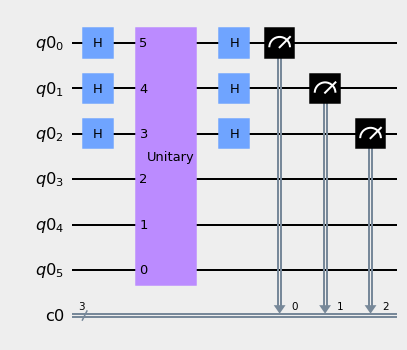

In [11]:
a,b,c,d, qc,acc = runMainCircuit(3,verbose=True,withNoise = 0)
print("Accuracy of generating equations:", acc)
print("Circuit used to solve problem: ")
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})




Input Length:  4
Function show
Function is created with s = 1001
Input, Output
0000 0101
0001 0100
0010 1010
0011 1000
0100 1110
0101 1111
0110 0000
0111 1011
1000 0100
1001 0101
1010 1000
1011 1010
1100 1111
1101 1110
1110 1011
1111 0000


Predicted s =  1001
Time taken to create circuit:  0.03144645690917969
Time taken for execution of quantum circuit:  48.0337336063385
Time taken for executing classical parth:  0.002492189407348633
Time taken for executing whole program:  48.06767225265503
Accuracy of generating equations: 1.0
Circuit used to solve problem: 


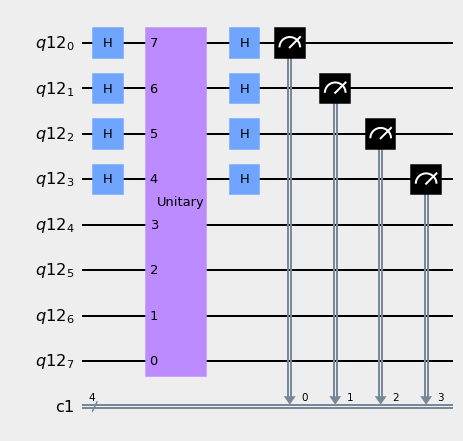

In [12]:
a,b,c,d,qc,acc = runMainCircuit(4,withNoise=1)
print("Accuracy of generating equations:", acc)
print("Circuit used to solve problem: ")
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Input Length:  5
Function show
Function is created with s = 01101
Input, Output
00000 01110
00001 10001
00010 11000
00011 11011
00100 10101
00101 01011
00110 11110
00111 10100
01000 01011
01001 10101
01010 10100
01011 11110
01100 10001
01101 01110
01110 11011
01111 11000
10000 11100
10001 01010
10010 10110
10011 00111
10100 11111
10101 00011
10110 11101
10111 00101
11000 00011
11001 11111
11010 00101
11011 11101
11100 01010
11101 11100
11110 00111
11111 10110


Predicted s =  01101
Time taken to create circuit:  0.3789784908294678
Time taken for execution of quantum circuit:  1.035292387008667
Time taken for executing classical parth:  0.003435373306274414
Time taken for executing whole program:  1.4177062511444092
Accuracy of generating equations: 1.0
Circuit used to solve problem: 


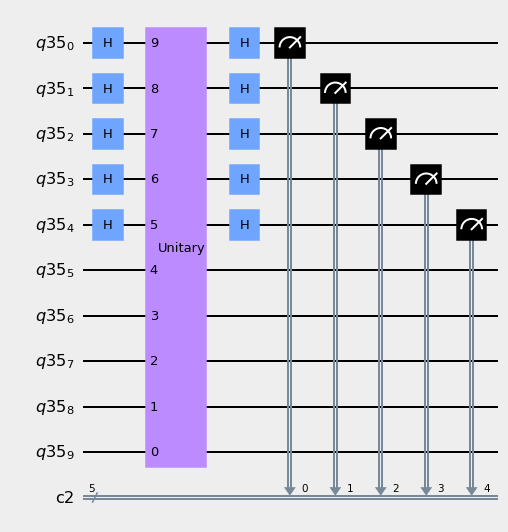

In [13]:
a,b,c,d,qc,acc = runMainCircuit(5)
print("Accuracy of generating equations:", acc)
print("Circuit used to solve problem: ")
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

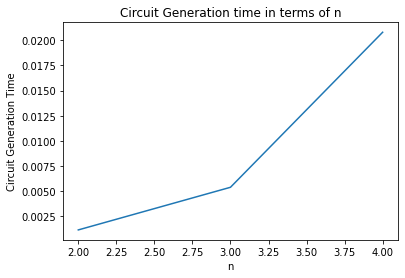

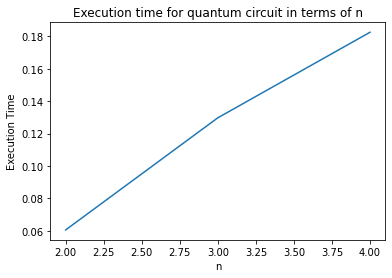

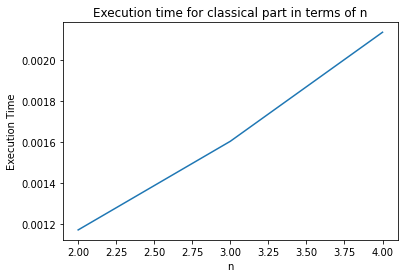

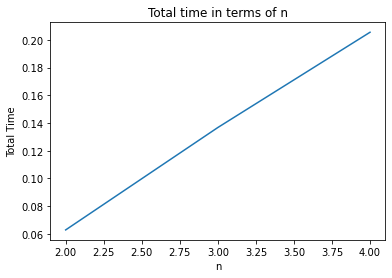

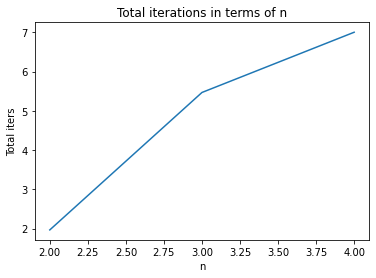

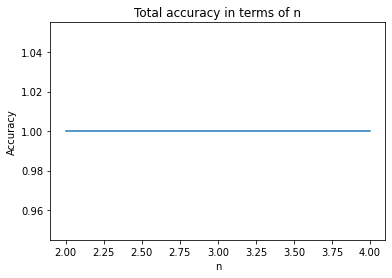

In [14]:
circuitTimes = []
execution_quantum_Times = []
execution_classical_Times = []
totalTimes = []
total_counts = []
graph_ac = []
iterr = 30

for n in range(2, 5):
    ct = 0
    etq = 0
    etc = 0
    tt = 0
    coun = 0
    total_ac = 0
    for i in tqdm(range(iterr)):
        (circuit, execution_q, execution_c,count,_,ac) = runMainCircuit(n, False)
        ct += circuit
        etq += execution_q
        etc += execution_c
        tt += circuit + execution_q + execution_c
        coun += count
        total_ac += ac
    circuitTimes.append(ct / iterr)
    execution_quantum_Times.append(etq / iterr)
    execution_classical_Times.append(etc / iterr)
    totalTimes.append(tt / iterr)
    total_ac /= iterr 
    coun = coun*(n-1)
    # print(coun)
    total_counts.append(coun/iterr)
    graph_ac.append(total_ac)


x_axis = [2, 3, 4]
plt.plot(x_axis, circuitTimes)
plt.title('Circuit Generation time in terms of n')
plt.ylabel('Circuit Generation Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, execution_quantum_Times)
plt.title('Execution time for quantum circuit in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, execution_classical_Times)
plt.title('Execution time for classical part in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, totalTimes)
plt.title('Total time in terms of n')
plt.ylabel('Total Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, total_counts)
plt.title('Total iterations in terms of n')
plt.ylabel('Total iters')
plt.xlabel('n')
plt.show() 


plt.plot(x_axis, graph_ac)
plt.title('Total accuracy in terms of n')
plt.ylabel('Accuracy')
plt.xlabel('n')
plt.show() 

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

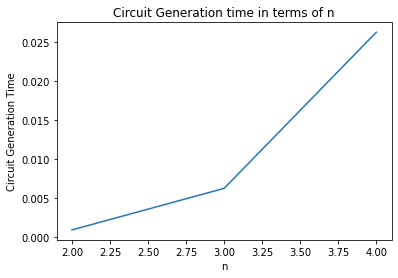

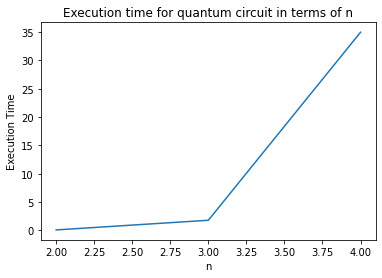

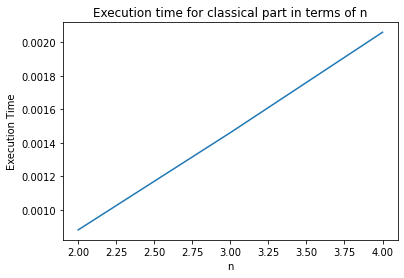

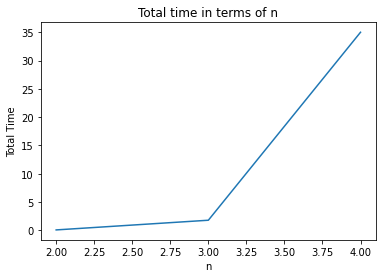

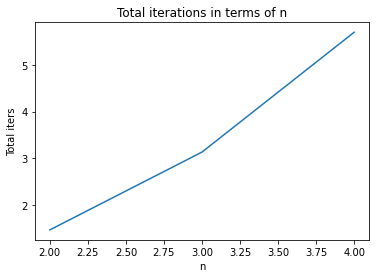

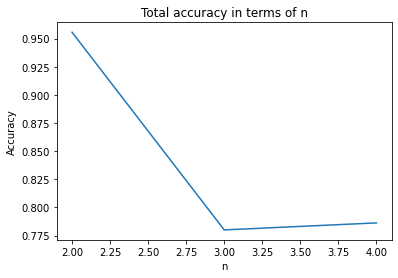

In [22]:
circuitTimes = []
execution_quantum_Times = []
execution_classical_Times = []
totalTimes = []
total_counts = []
graph_ac = []
iterr = 30

for n in range(2, 5):
    ct = 0
    etq = 0
    etc = 0
    tt = 0
    coun = 0
    total_ac = 0
    for i in tqdm(range(iterr)):
        (circuit, execution_q, execution_c,count,_,ac) = runMainCircuit(n, False,1,p1=0.1,p2=0.1)
        ct += circuit
        etq += execution_q
        etc += execution_c
        tt += circuit + execution_q + execution_c
        coun += count
        total_ac += ac
    circuitTimes.append(ct / iterr)
    execution_quantum_Times.append(etq / iterr)
    execution_classical_Times.append(etc / iterr)
    totalTimes.append(tt / iterr)
    total_ac /= iterr 
    coun = coun*(n-1)
    # print(coun)
    total_counts.append(coun/iterr)
    graph_ac.append(total_ac)


x_axis = [2, 3, 4]
plt.plot(x_axis, circuitTimes)
plt.title('Circuit Generation time in terms of n')
plt.ylabel('Circuit Generation Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, execution_quantum_Times)
plt.title('Execution time for quantum circuit in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, execution_classical_Times)
plt.title('Execution time for classical part in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, totalTimes)
plt.title('Total time in terms of n')
plt.ylabel('Total Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, total_counts)
plt.title('Total iterations in terms of n')
plt.ylabel('Total iters')
plt.xlabel('n')
plt.show() 


plt.plot(x_axis, graph_ac)
plt.title('Total accuracy in terms of n')
plt.ylabel('Accuracy')
plt.xlabel('n')
plt.show() 

  0%|          | 0/30 [00:00<?, ?it/s]

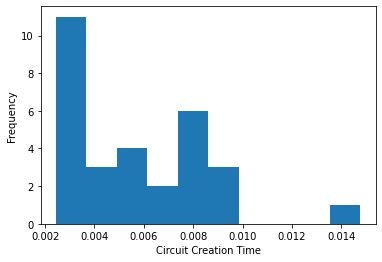

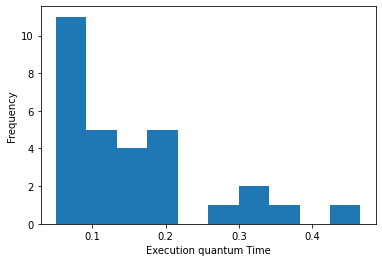

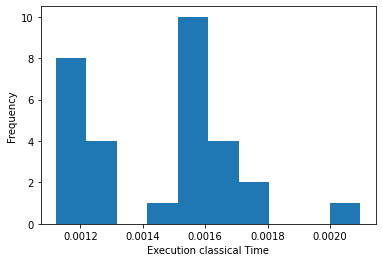

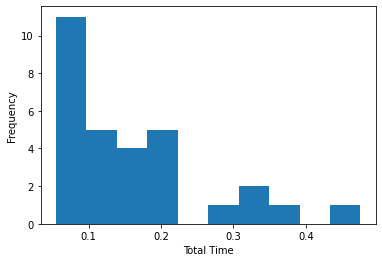

In [16]:
circuitTimes = []
execution_quantum_Times = []
execution_classical_Times = []
totalTimes = []
iterr = 30
for i in tqdm(range(iterr)):
    (circuit , execution_q, execution_c,_,_,_) = runMainCircuit(3, False)
    circuitTimes.append(circuit)
    execution_quantum_Times.append(execution_q)
    execution_classical_Times.append(execution_c)
    totalTimes.append(circuit + execution_q + execution_c)
plt.hist(circuitTimes)
plt.xlabel('Circuit Creation Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(execution_quantum_Times)
plt.xlabel('Execution quantum Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(execution_classical_Times)
plt.xlabel('Execution classical Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(totalTimes)
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.show() 

  0%|          | 0/30 [00:00<?, ?it/s]

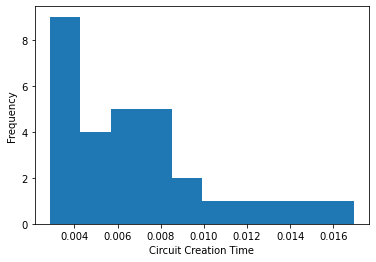

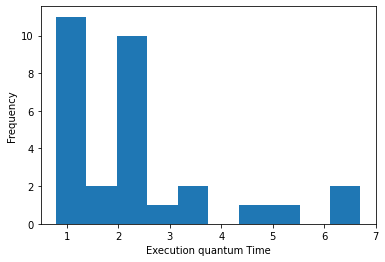

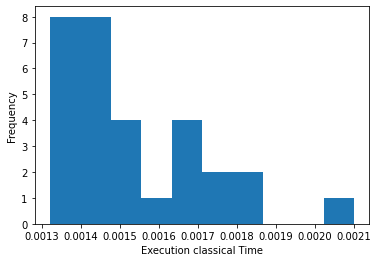

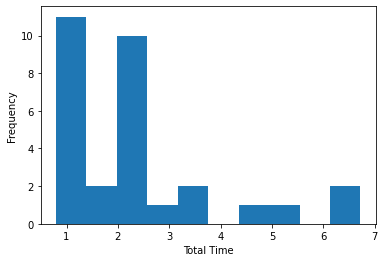

In [17]:
circuitTimes = []
execution_quantum_Times = []
execution_classical_Times = []
totalTimes = []
iterr = 30
for i in tqdm(range(iterr)):
    (circuit , execution_q, execution_c,_,_,_) = runMainCircuit(3, False,1)
    circuitTimes.append(circuit)
    execution_quantum_Times.append(execution_q)
    execution_classical_Times.append(execution_c)
    totalTimes.append(circuit + execution_q + execution_c)
plt.hist(circuitTimes)
plt.xlabel('Circuit Creation Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(execution_quantum_Times)
plt.xlabel('Execution quantum Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(execution_classical_Times)
plt.xlabel('Execution classical Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(totalTimes)
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.show() 

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

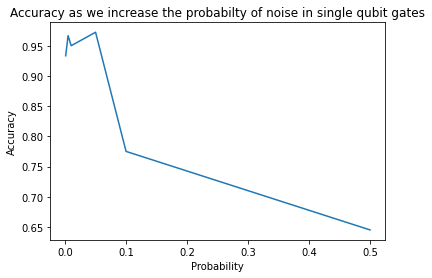

In [18]:
iterr = 10
lis_p = [0.001,0.005,0.01,0.05,0.1,0.5]
graph_acc = []
for p in lis_p:
    total_ac = 0
    
    for i in tqdm(range(iterr)):
        (circuit, execution_q, execution_c,count,_,ac) = runMainCircuit(3, False,1,p)
        
        total_ac += ac
    
    total_ac /= iterr 
    graph_acc.append(total_ac)
 



plt.plot(lis_p, graph_acc)
plt.title('Accuracy as we increase the probabilty of noise in single qubit gates')
plt.ylabel('Accuracy')
plt.xlabel('Probability')
plt.show() 

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

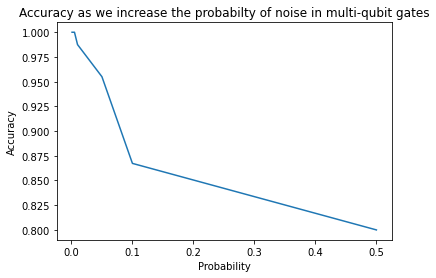

In [20]:
iterr = 10
lis_p = [0.001,0.005,0.01,0.05,0.1,0.5]
graph_acc = []
for p in lis_p:
    total_ac = 0
    
    for i in tqdm(range(iterr)):
        (circuit, execution_q, execution_c,count,_,ac) = runMainCircuit(3, False,1,p1=0.001,p2 = p)
        
        total_ac += ac
    
    total_ac /= iterr 
    graph_acc.append(total_ac)
 



plt.plot(lis_p, graph_acc)
plt.title('Accuracy as we increase the probabilty of noise in multi-qubit gates')
plt.ylabel('Accuracy')
plt.xlabel('Probability')
plt.show() 